In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [2]:
# create the artificial dataset 

# generates a 500 sample data set with 3 features, 6 centers, and a cluster standard deviation of 1.5
x, y = make_blobs(n_samples=500, n_features=3, centers=6, cluster_std=1.5, random_state=3)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (500, 3)
y shape: (500,)


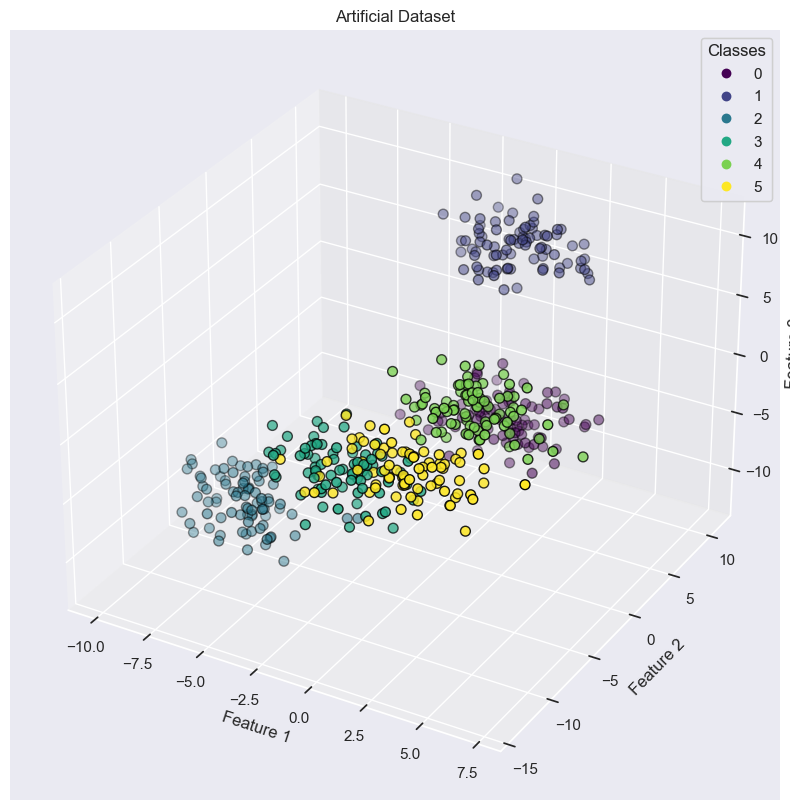

In [3]:
# visualize the data using matplotlib

sns.set_theme('notebook')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis', s=50, edgecolors='black')

# Add labels
ax.set_title('Artificial Dataset')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

In [4]:
# split the data into training and testing sets
# 80% of the data will be used for training and 20% will be used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [5]:
# create the KNN model
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn100 = KNeighborsClassifier(n_neighbors=100)

In [6]:
# train the model
knn5.fit(x_train, y_train)
knn10.fit(x_train, y_train)
knn1.fit(x_train, y_train)
knn100.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [7]:
# predict on actual values
y_pred5 = knn5.predict(x_test)
y_pred10 = knn10.predict(x_test)
y_pred1 = knn1.predict(x_test)
y_pred100 = knn100.predict(x_test)

In [8]:
# accuracy score
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy10 = accuracy_score(y_test, y_pred10)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy100 = accuracy_score(y_test, y_pred100)
print(f'Accuracy for 5 neighbors: {accuracy5}')
print(f'Accuracy for 10 neighbors: {accuracy10}')
print(f'Accuracy for 1 neighbor: {accuracy1}')
print(f'Accuracy for 100 neighbors: {accuracy100}')

Accuracy for 5 neighbors: 0.95
Accuracy for 10 neighbors: 0.95
Accuracy for 1 neighbor: 0.92
Accuracy for 100 neighbors: 0.95


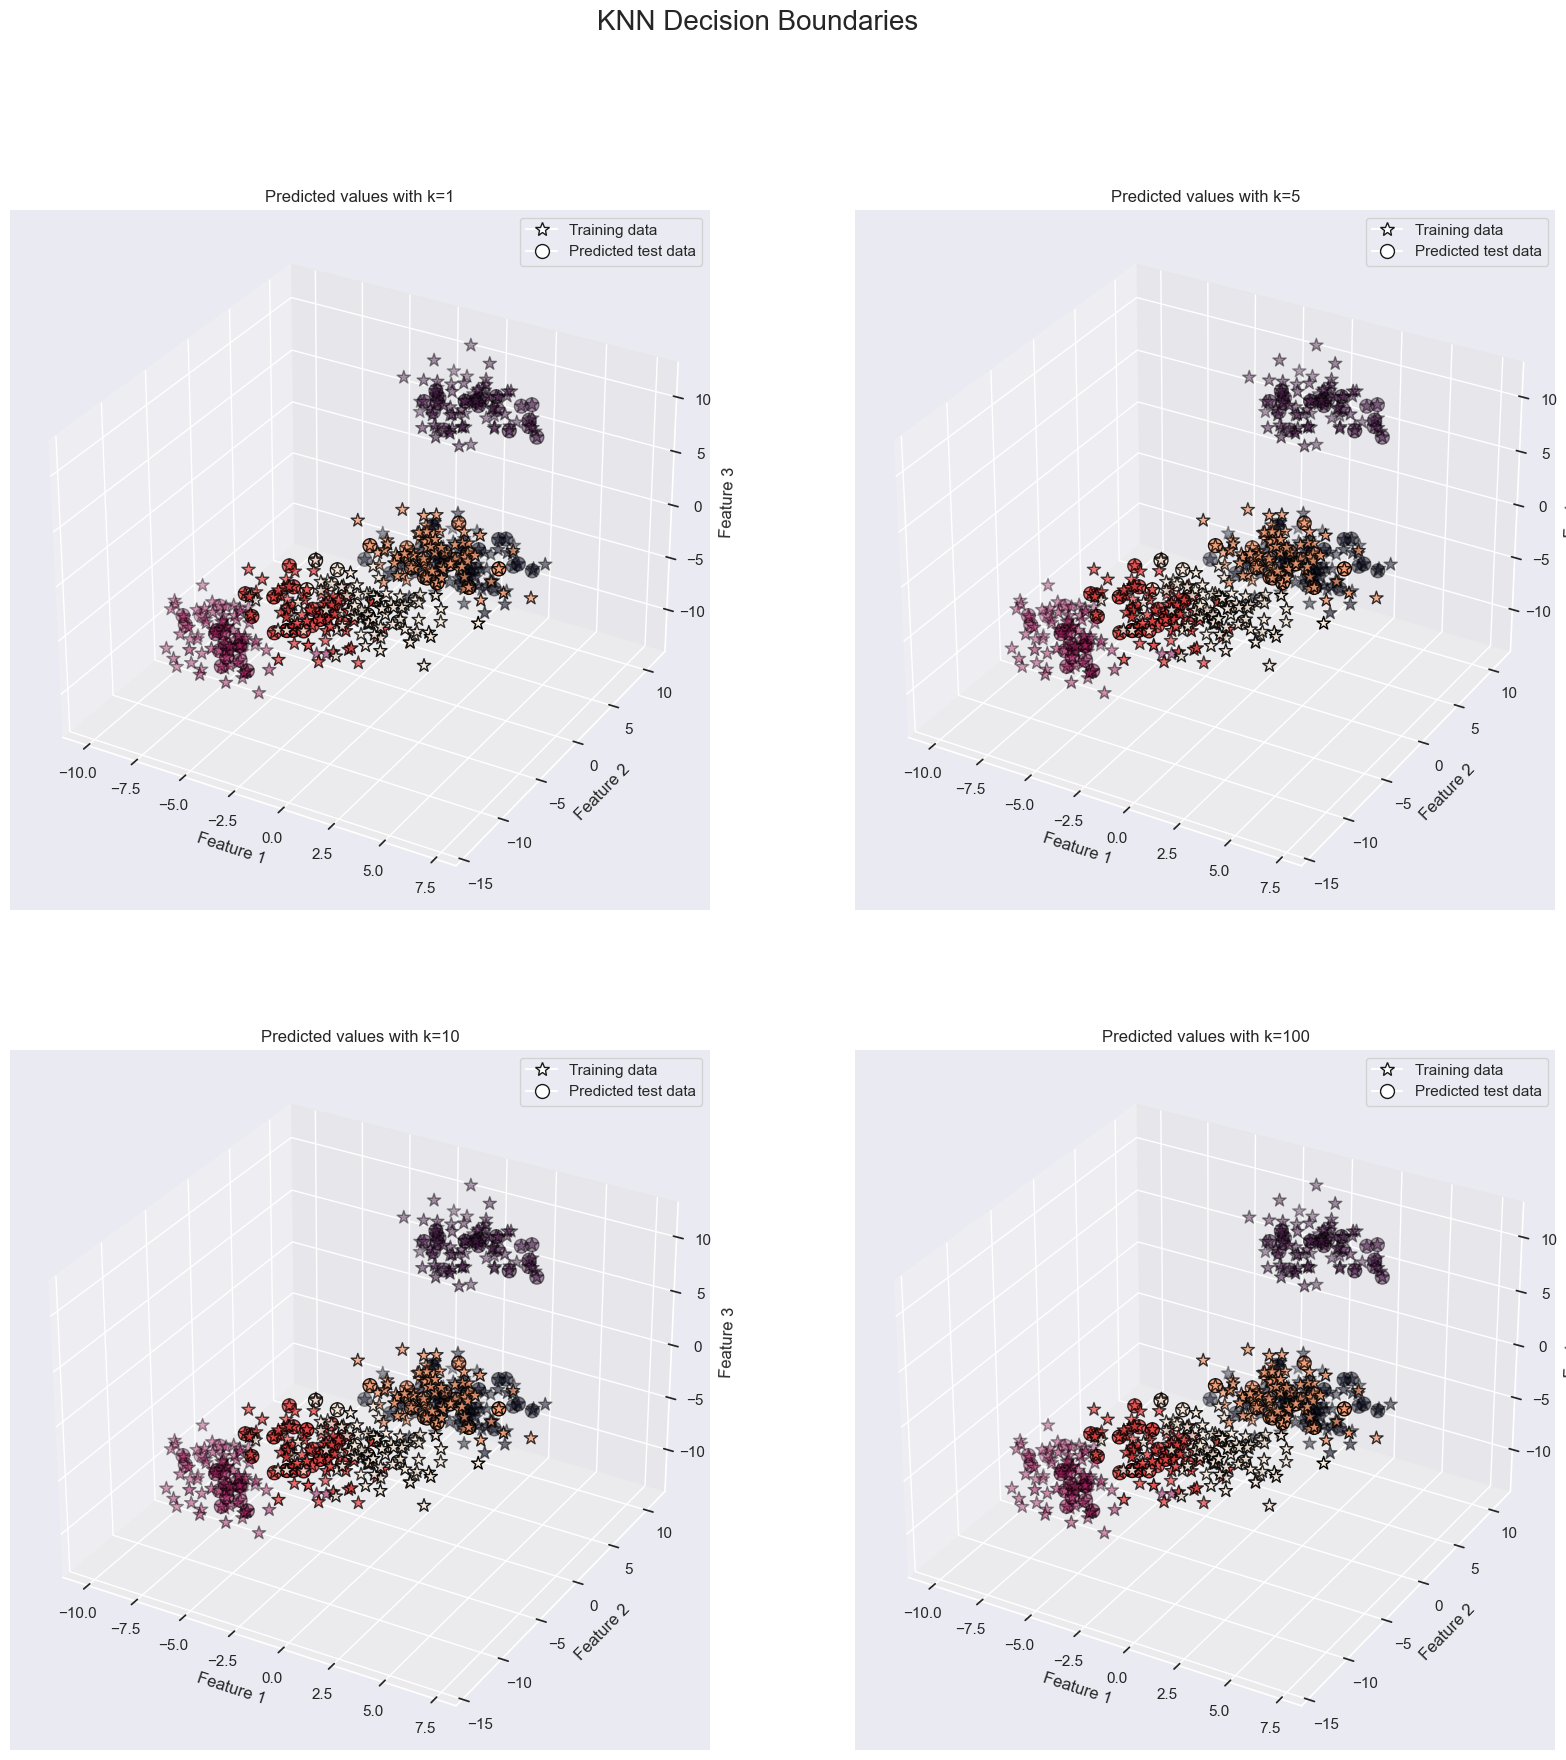

In [9]:
# Create the figure
sns.set_theme('notebook')
fig = plt.figure(figsize=(20, 20))
fig_title = fig.suptitle('KNN Decision Boundaries', fontsize=20)

# Plot k = 1
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title('Predicted values with k=1')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
train_plot1 = ax1.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot1 = ax1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred1, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 5
ax2 = fig.add_subplot(222, projection='3d')
ax2.set_title('Predicted values with k=5')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
train_plot2 = ax2.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot2 = ax2.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred5, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 10
ax3 = fig.add_subplot(223, projection='3d')
ax3.set_title('Predicted values with k=10')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
train_plot3 = ax3.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot3 = ax3.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred10, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Plot k = 100
ax4 = fig.add_subplot(224, projection='3d')
ax4.set_title('Predicted values with k=100')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')
ax4.set_zlabel('Feature 3')
train_plot4 = ax4.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, s=100, edgecolors='black', marker='*', label='Training data')
test_plot4 = ax4.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred100, s=100, edgecolors='black', marker='o', label='Predicted test data')

# Create custom legends
custom_lines = [
    Line2D([0], [0], marker='*', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='Training data'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='Predicted test data')
]

# Add legends
ax1.legend(handles=custom_lines, loc='best')
ax2.legend(handles=custom_lines, loc='best')
ax3.legend(handles=custom_lines, loc='best')
ax4.legend(handles=custom_lines, loc='best')

# Show the plots
plt.show()